In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from postgres_conector import PostgresConnector

In [3]:
connection = PostgresConnector().get_connection()

cursor = connection.cursor()
cursor.execute("SELECT * FROM candidates")

rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

candidates_df = pd.DataFrame(rows, columns=columns)
print(candidates_df)
candidates_df.info()

cursor.close()
connection.close()

       First Name   Last Name                       Email Application Date  \
0      Bernadette   Langworth         leonard91@yahoo.com       2021-02-26   
1          Camryn    Reynolds         zelda56@hotmail.com       2021-09-09   
2           Larue      Spinka    okey_schultz41@gmail.com       2020-04-14   
3            Arch      Spinka      elvera_kulas@yahoo.com       2020-10-01   
4           Larue  Altenwerth   minnie.gislason@gmail.com       2020-05-20   
...           ...         ...                         ...              ...   
49995     Bethany     Shields  rocky_mitchell@hotmail.com       2022-01-09   
49996         Era  Swaniawski    dolores.roob@hotmail.com       2020-06-02   
49997      Martin       Lakin   savanah.stracke@gmail.com       2018-12-15   
49998       Aliya   Abernathy  vivienne.fritsch@yahoo.com       2020-05-30   
49999     Coleman      Wisozk   abigayle.crooks@yahoo.com       2022-06-13   

                  Country  YOE  Seniority                      

In [8]:
hired_df = candidates_df[(candidates_df["Code Challenge Score"]>=7)&(candidates_df["Technical Interview Score"]>=7)]
hired_df["Application Date"] = pd.to_datetime(hired_df["Application Date"])
hired_df["Year"]= hired_df["Application Date"].dt.year
hired_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 2 to 49990
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   First Name                 6698 non-null   object        
 1   Last Name                  6698 non-null   object        
 2   Email                      6698 non-null   object        
 3   Application Date           6698 non-null   datetime64[ns]
 4   Country                    6698 non-null   object        
 5   YOE                        6698 non-null   int64         
 6   Seniority                  6698 non-null   object        
 7   Technology                 6698 non-null   object        
 8   Code Challenge Score       6698 non-null   int64         
 9   Technical Interview Score  6698 non-null   int64         
 10  Year                       6698 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(6)
memory usage: 601.8+ 

/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_67770/757962674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hired_df["Application Date"] = pd.to_datetime(hired_df["Application Date"])
/var/folders/rl/vms135cd0_j0814rxx3vxc4w0000gn/T/ipykernel_67770/757962674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hired_df["Year"]= hired_df["Application Date"].dt.year


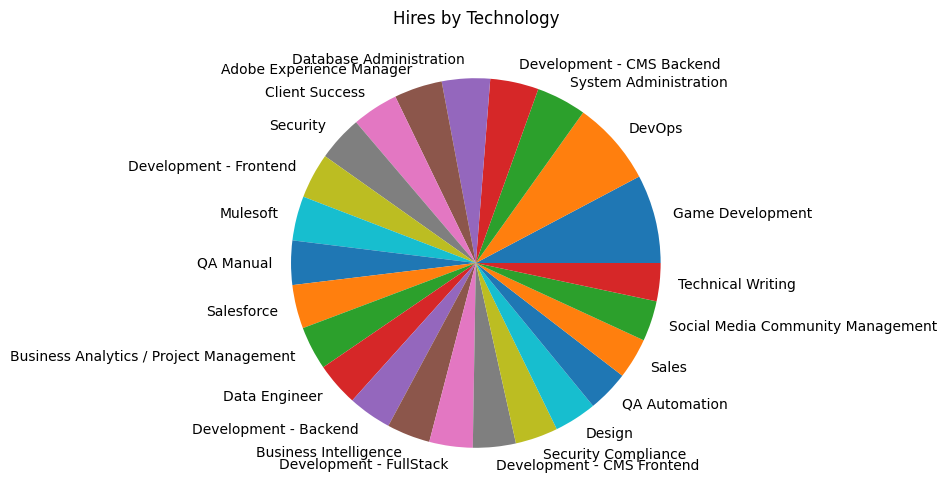

In [9]:
#Hires by technology (pie chart)
summary = hired_df["Technology"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(summary, labels=summary.index)
plt.title("Hires by Technology")
plt.show()

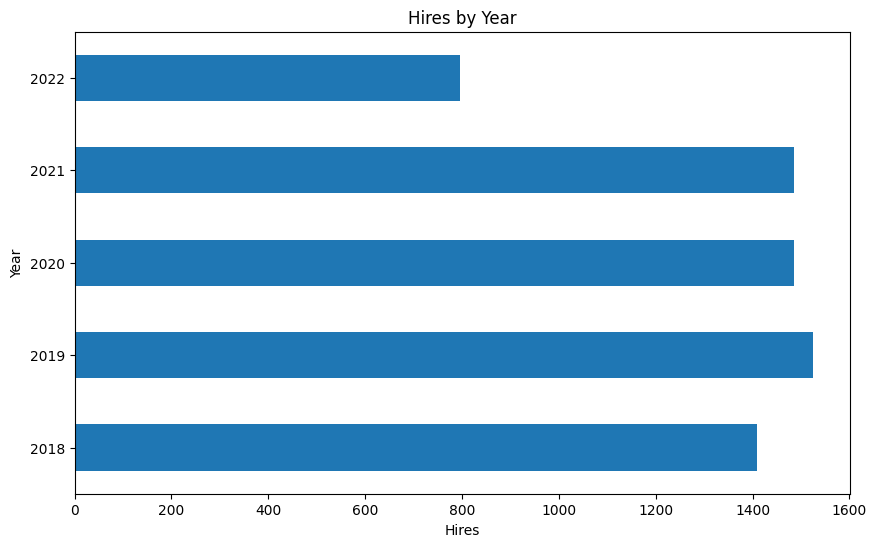

In [11]:
#Hires by year (horizontal bar chart)
summary = hired_df.groupby("Year")["Email"].count()
plt.figure(figsize=(10,6))
summary.plot(kind="barh")
plt.title("Hires by Year")
plt.xlabel("Hires")
plt.show()

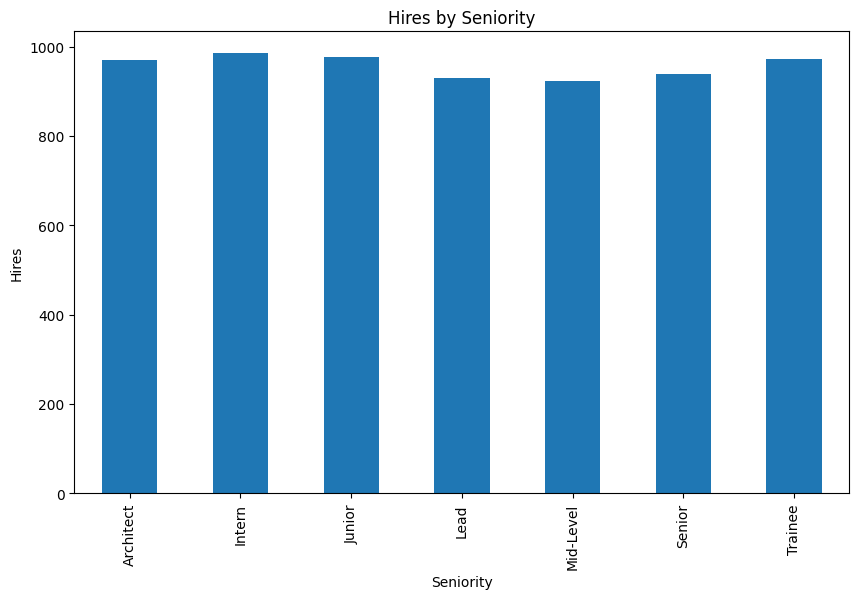

In [13]:
#Hires by seniority (bar chart)
summary = hired_df.groupby("Seniority")["Email"].count()
plt.figure(figsize=(10,6))
summary.plot(kind="bar")
plt.title("Hires by Seniority")
plt.ylabel("Hires")
plt.show()

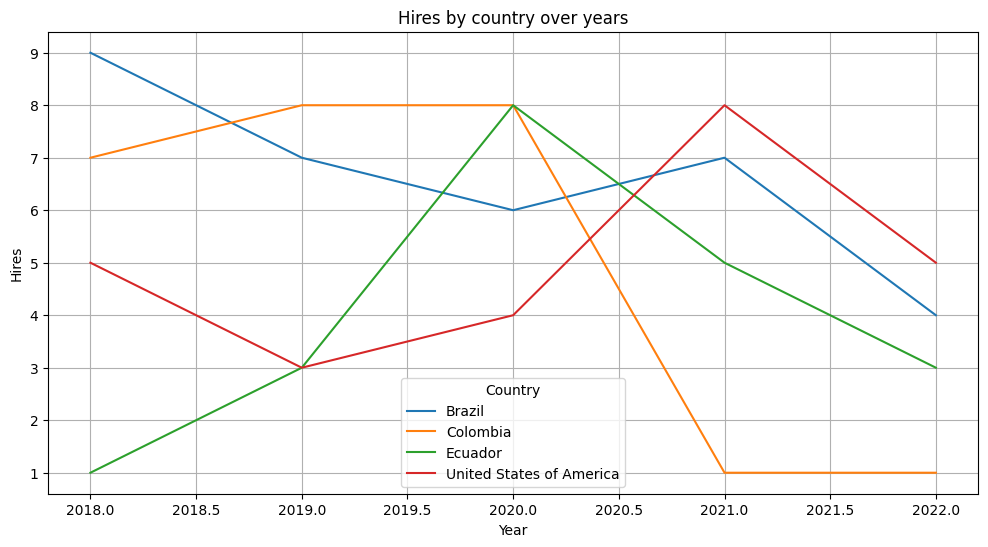

In [19]:
#Hires by country over years (USA, Brazil, Colombia, and Ecuador only)(multiline chart)
hired_by_country_df =  hired_df[hired_df["Country"].isin(["United States of America", "Brazil", "Colombia", "Ecuador"])]
summary = hired_by_country_df.groupby(["Year", "Country"]).size().reset_index(name="Hires")
plt.figure(figsize=(12,6))
sns.lineplot(data=summary, x="Year", y="Hires", hue="Country")
plt.title("Hires by country over years")
plt.grid(True)
plt.show()